File Name: assignment_08.ipynb

Description: This program analyzes and visualizes COVID-19 data by performing data cleaning, handling missing values, grouping by time and location, and generating line plots and bar charts to illustrate trends in cases and deaths worldwide and for specific countries.

Record of Revisions (Date | Author | Change):  
04/10/2024 | Rhys DeLoach | Initial creation

In [2]:
# Dataset: Read Dataset
import pandas as pd
import matplotlib.pyplot as plt

covid_data= pd.read_csv('data/covid_data.csv')
covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,40099462.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228978,ZWE,Africa,Zimbabwe,2022-10-16,257893.0,66.0,34.000,5606.0,1.0,0.286,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN
228979,ZWE,Africa,Zimbabwe,2022-10-17,257893.0,0.0,20.571,5606.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN
228980,ZWE,Africa,Zimbabwe,2022-10-18,257893.0,0.0,20.571,5606.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN
228981,ZWE,Africa,Zimbabwe,2022-10-19,257893.0,0.0,13.571,5606.0,0.0,0.286,...,30.7,36.791,1.7,61.49,0.571,15993524.0,NaN,NaN,NaN,NaN


In [27]:
# Gather Info
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228983 entries, 0 to 228982
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    228983 non-null  object 
 1   continent                                   216050 non-null  object 
 2   location                                    228983 non-null  object 
 3   date                                        228983 non-null  object 
 4   total_cases                                 215997 non-null  float64
 5   new_cases                                   215741 non-null  float64
 6   new_cases_smoothed                          214545 non-null  float64
 7   total_deaths                                196813 non-null  float64
 8   new_deaths                                  196763 non-null  float64
 9   new_deaths_smoothed                         195583 non-null  float64
 

In [19]:
# Gather Statistics
covid_data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.159970e+05,2.157410e+05,2.145450e+05,1.968130e+05,196763.000000,195583.000000,215010.000000,214754.000000,213563.000000,195839.000000,...,137823.000000,90864.000000,164280.000000,210425.000000,180056.000000,2.279960e+05,7.686000e+03,7686.000000,7736.00000,7686.000000
mean,4.410898e+06,1.239274e+04,1.242634e+04,7.380919e+04,138.777138,139.447612,59770.411473,189.241267,189.694942,688.702936,...,32.809916,50.927258,3.089017,73.618181,0.724799,1.399627e+08,4.785388e+04,9.876106,14.34651,1333.351425
std,2.758180e+07,8.540771e+04,8.345873e+04,3.796541e+05,731.163458,716.731854,106030.314864,1051.118995,667.604726,974.298736,...,13.534790,31.881740,2.552304,7.446234,0.149609,6.876194e+08,1.325075e+05,13.511560,26.39345,1716.352492
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-28.450000,-95.92000,-1884.678982
25%,4.294000e+03,0.000000e+00,6.000000e+00,1.130000e+02,0.000000,0.000000,1078.953500,0.000000,1.342000,29.353000,...,21.600000,20.859000,1.300000,69.500000,0.602000,8.960070e+05,3.152500e+01,0.510000,-0.10250,25.171627
50%,4.865800e+04,5.400000e+01,9.457100e+01,1.169000e+03,1.000000,1.571000,10246.401500,7.571000,19.349000,212.240000,...,31.400000,49.839000,2.500000,75.050000,0.742000,6.885868e+06,5.874900e+03,7.390000,7.33000,793.369452
75%,5.186320e+05,9.600000e+02,1.129286e+03,9.726000e+03,14.000000,15.857000,72152.583000,97.338000,135.787000,1019.907000,...,41.300000,83.241000,4.200000,79.070000,0.845000,3.298164e+07,3.451410e+04,15.530000,19.81000,2079.898586
max,6.267835e+08,4.081954e+06,3.436022e+06,6.575340e+06,17731.000000,14857.714000,662430.093000,195005.313000,36401.607000,6432.566000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.909295e+09,1.224011e+06,76.550000,376.51000,9766.306877


In [3]:
# Shape Before Pre-Processing
covid_data.shape

(228983, 67)

In [4]:
# Pre-Processing
total_rows = covid_data.shape[0]

for column_label, totals in covid_data.isnull().sum().items():
    percentage_missing = (totals/total_rows * 100)
    if percentage_missing >= 60:
        covid_data.drop(column_label,axis = 1,inplace=True)

covid_data.dropna(axis=0,inplace=True)

covid_data.drop(covid_data.filter(regex = 'smoothed'),axis=1,inplace=True)

covid_data['date'] = pd.to_datetime(covid_data['date'])

covid_data.set_index('date', inplace=True)

missing_values = covid_data.isnull().sum()
print(f'Test for missing values...\n{missing_values}')

Test for missing values...
iso_code                      0
continent                     0
location                      0
total_cases                   0
new_cases                     0
total_deaths                  0
new_deaths                    0
total_cases_per_million       0
new_cases_per_million         0
total_deaths_per_million      0
new_deaths_per_million        0
reproduction_rate             0
positive_rate                 0
tests_per_case                0
tests_units                   0
stringency_index              0
population_density            0
median_age                    0
aged_65_older                 0
aged_70_older                 0
gdp_per_capita                0
extreme_poverty               0
cardiovasc_death_rate         0
diabetes_prevalence           0
female_smokers                0
male_smokers                  0
hospital_beds_per_thousand    0
life_expectancy               0
human_development_index       0
population                    0
dtype: int64


In [5]:
#Shape After Pre-Processing
covid_data.shape

(34652, 30)

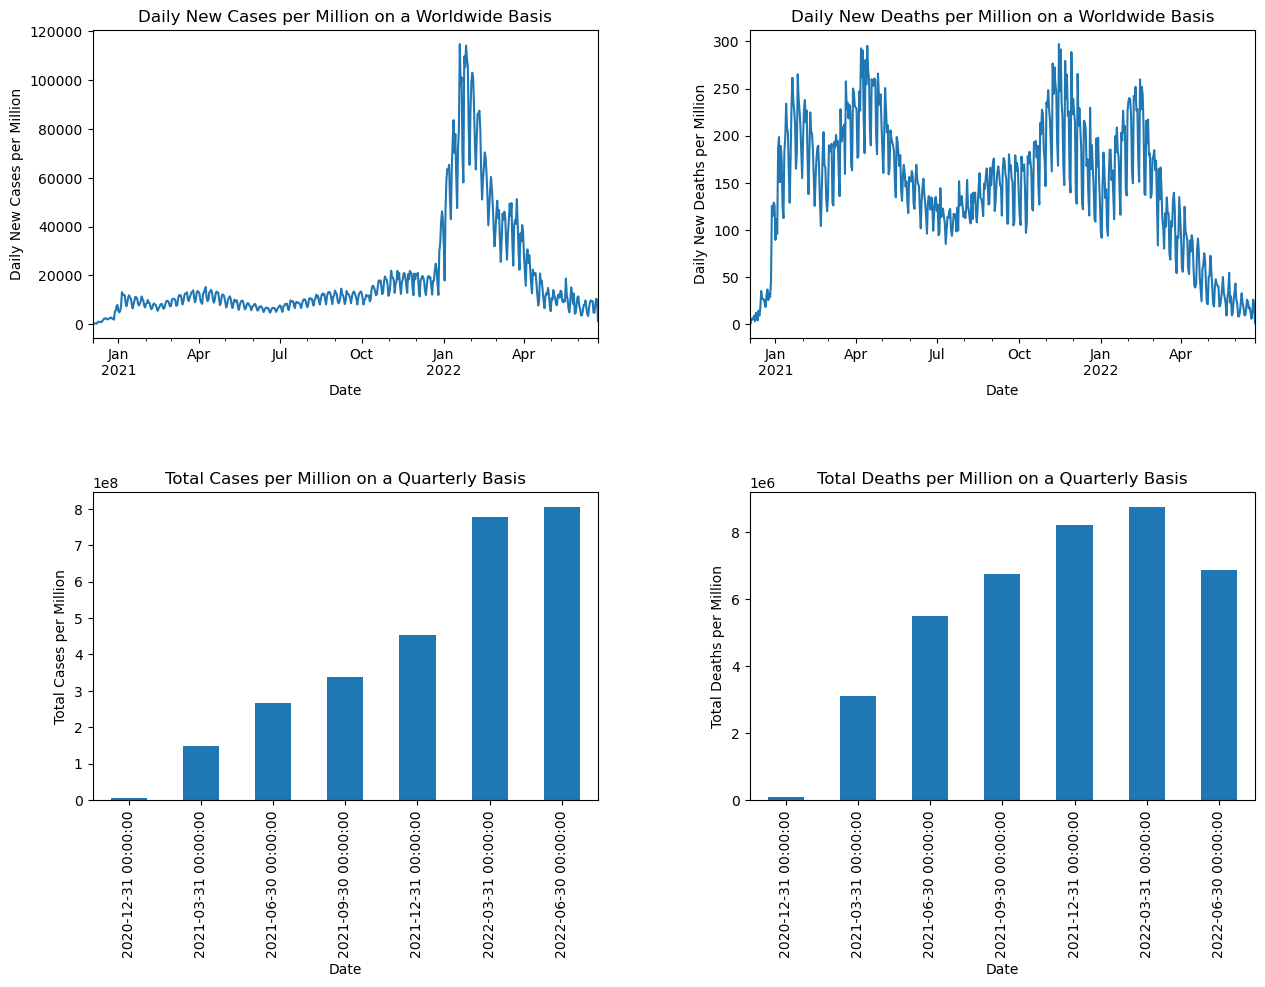

In [6]:
# Graphing Data by Grouping
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
summed_days = covid_data.groupby(level=0).sum()
summed_days['new_cases_per_million'].plot(ax=axs[0, 0], title='Daily New Cases per Million on a Worldwide Basis')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Daily New Cases per Million')
summed_days['new_deaths_per_million'].plot(ax=axs[0, 1], title='Daily New Deaths per Million on a Worldwide Basis')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Daily New Deaths per Million')
summed_quarters = covid_data.groupby(pd.Grouper(freq='3M')).sum()
summed_quarters['total_cases_per_million'].plot.bar(ax=axs[1, 0], title='Total Cases per Million on a Quarterly Basis')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Total Cases per Million')
summed_quarters['total_deaths_per_million'].plot.bar(ax=axs[1, 1], title='Total Deaths per Million on a Quarterly Basis')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Total Deaths per Million')
plt.subplots_adjust(hspace=0.5, wspace=0.3)
plt.show()

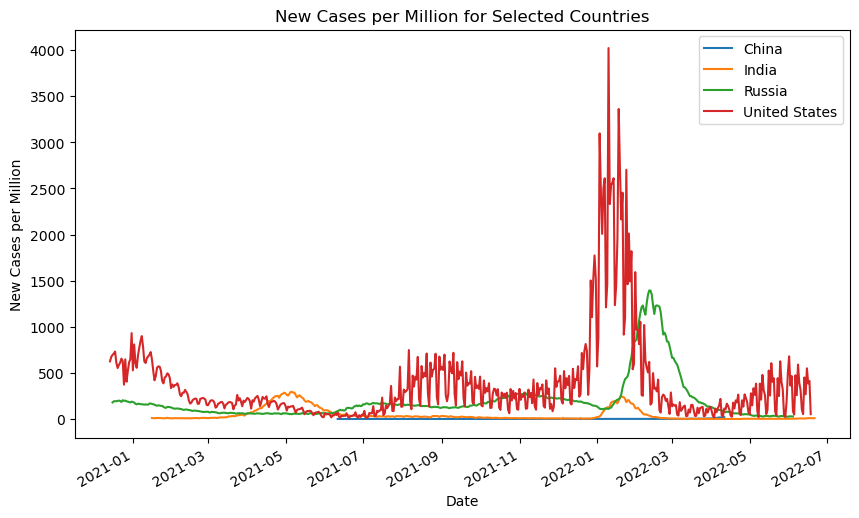

In [7]:
# Grouped Locations
grouped_locations = covid_data.groupby('location')

plt.figure(figsize=(10, 6))  # Adjust figure size as needed

for location, data in grouped_locations:
    if location in ['United States', 'China', 'Russia', 'France', 'India']:
        data['new_cases_per_million'].plot(label=location)

plt.xlabel('Date')
plt.ylabel('New Cases per Million')
plt.title('New Cases per Million for Selected Countries')
plt.legend()
plt.show()

# France was eliminated in Pre-Processing

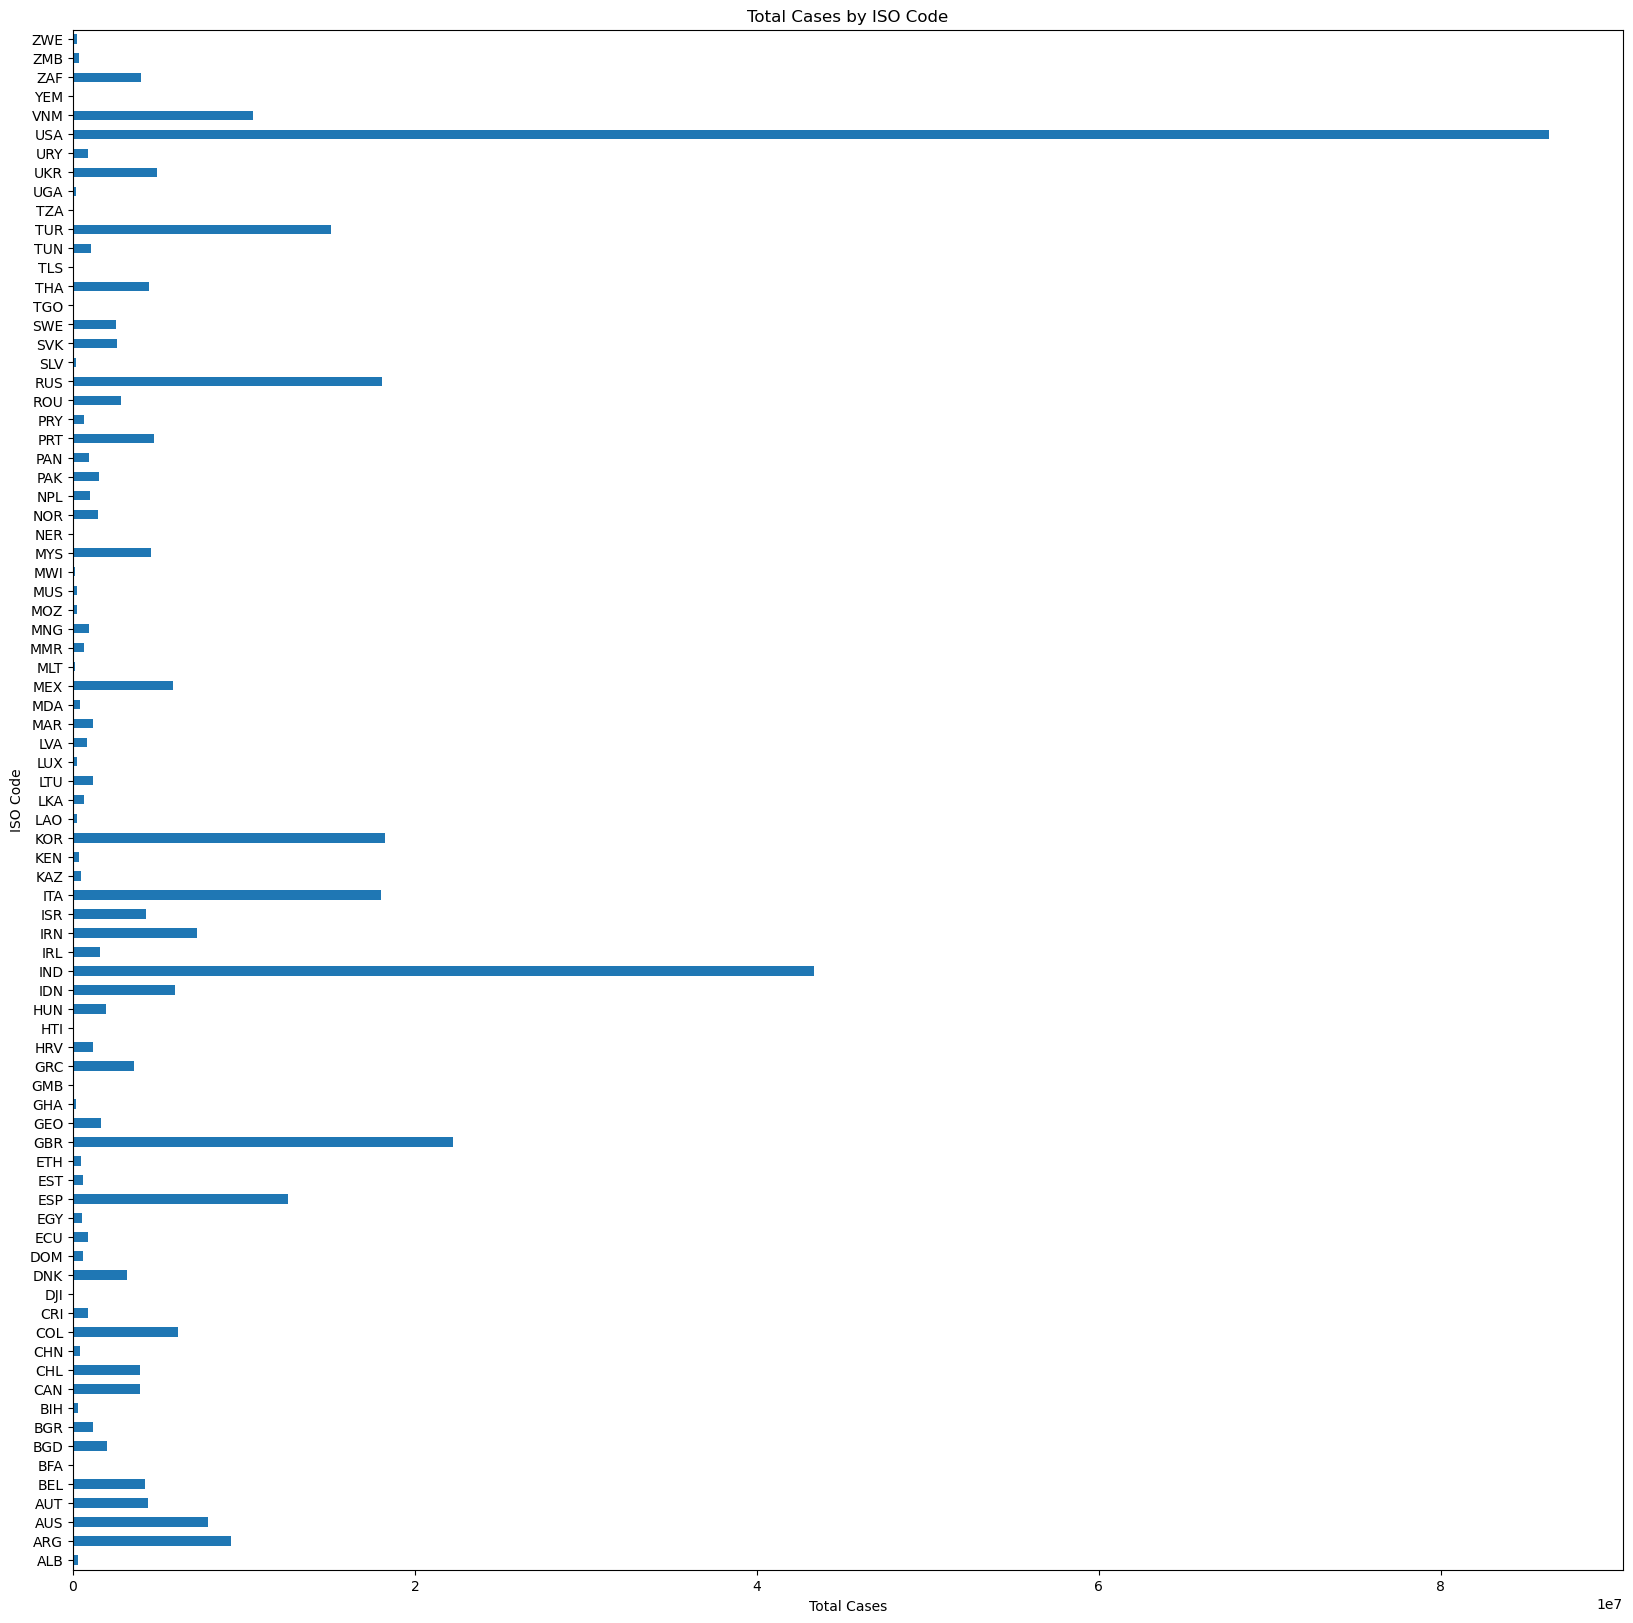

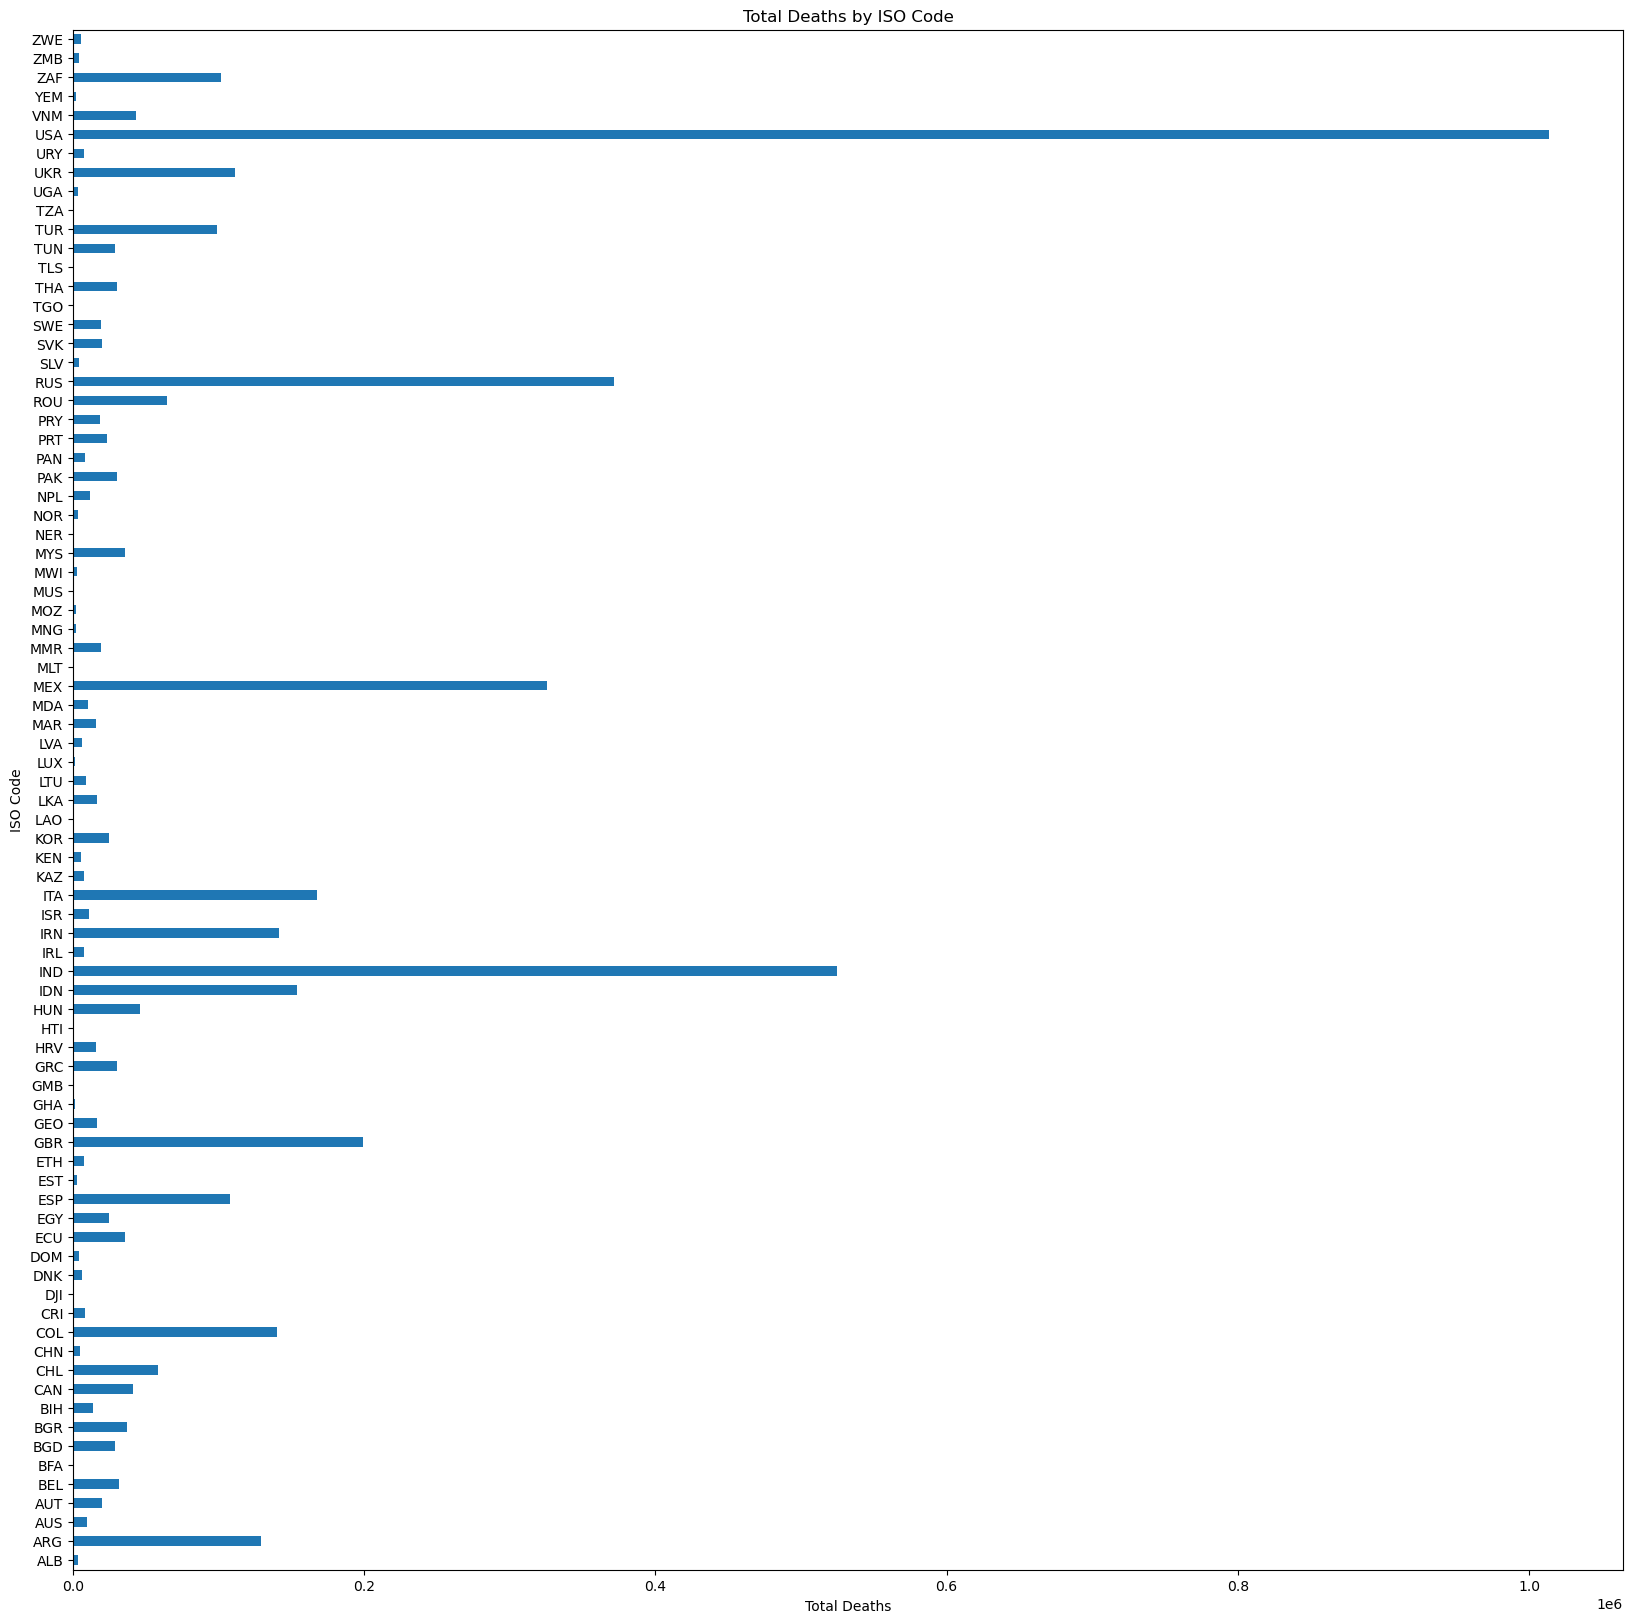

In [8]:
# Grouped Iso-Codes
max_total_cases = covid_data.groupby('iso_code')['total_cases'].max()

plt.figure(figsize=(20, 20))
max_total_cases.plot.barh()
plt.xlabel('Total Cases')
plt.ylabel('ISO Code')
plt.title('Total Cases by ISO Code')
plt.show()

max_total_deaths = covid_data.groupby('iso_code')['total_deaths'].max()

plt.figure(figsize=(20, 20))
max_total_deaths.plot.barh()
plt.xlabel('Total Deaths')
plt.ylabel('ISO Code')
plt.title('Total Deaths by ISO Code')
plt.show()
